In [14]:
import pandas as pd
import seaborn as sns

In [15]:
penguins = pd.read_csv('../datasets/penguins.csv')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

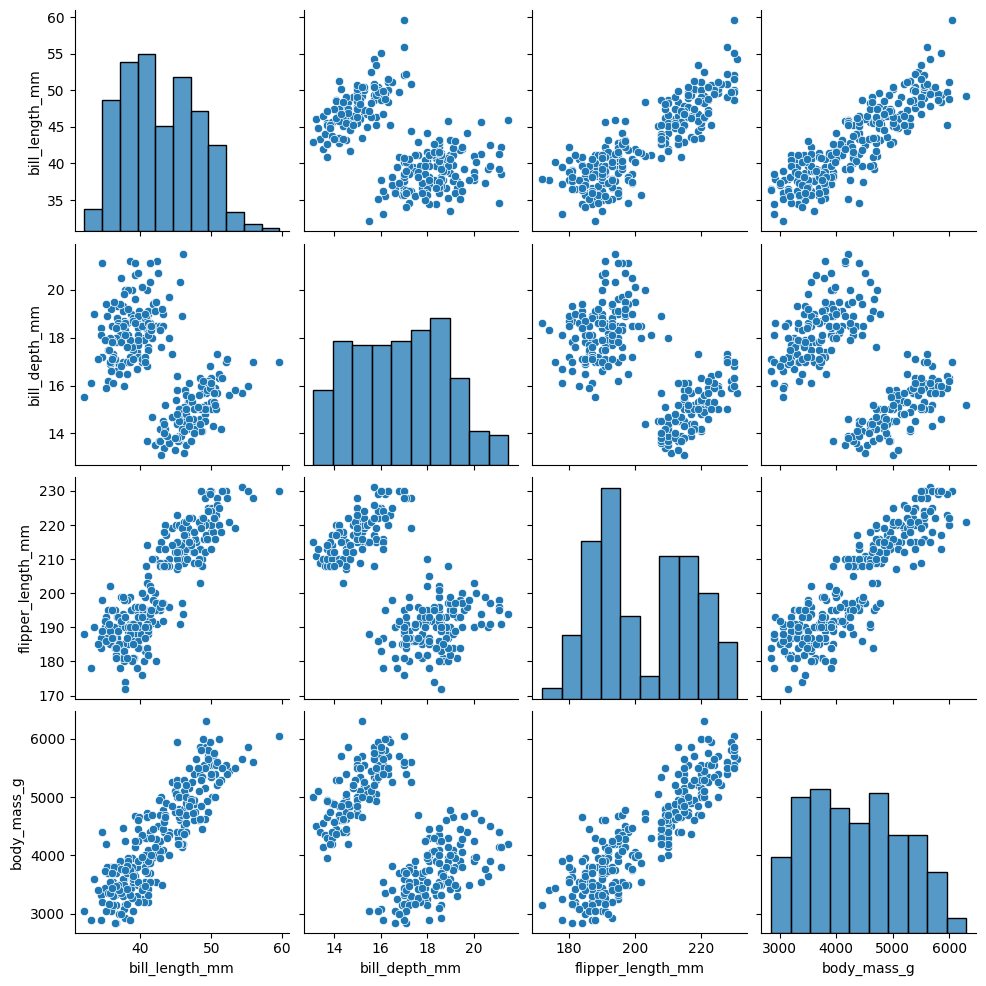

In [17]:
sns.pairplot(penguins_final)

In [18]:
# subset data for linear regression
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

In [22]:
# y or the dependent variable comes before the ~ and x or the independent variables comes after the ~
#              dependent       independent
ols_formula = "body_mass_g ~ bill_length_mm"

In [20]:
from statsmodels.formula.api import ols

In [23]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.33e-85
Time:                        22:14:00   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

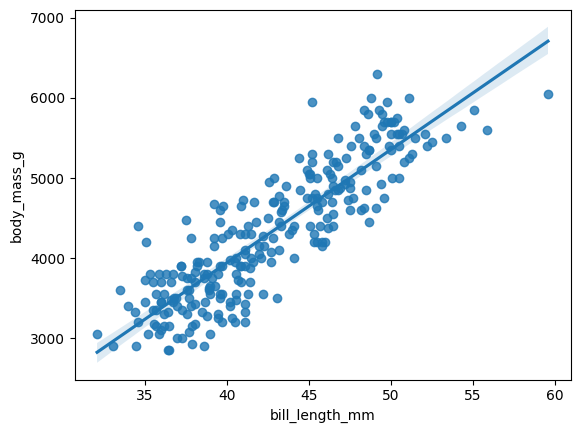

In [25]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

In [28]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)
print(fitted_values)

0      3813.254231
1      3869.730406
2      3982.682755
3      3474.397182
4      3841.492318
          ...     
260    4956.896771
261    4900.420596
262    5408.706170
263    4674.515897
264    5338.110951
Length: 265, dtype: float64


In [29]:
# calculating residuals
residuals = model.resid
print(residuals)

0      -63.254231
1      -69.730406
2     -732.682755
3      -24.397182
4     -191.492318
          ...    
260    -31.896771
261    -50.420596
262    341.293830
263    525.484103
264     61.889049
Length: 265, dtype: float64


from the below histogram, the residuals are almost normally distributed. in this case, it is likely close enough that the assumption is met.

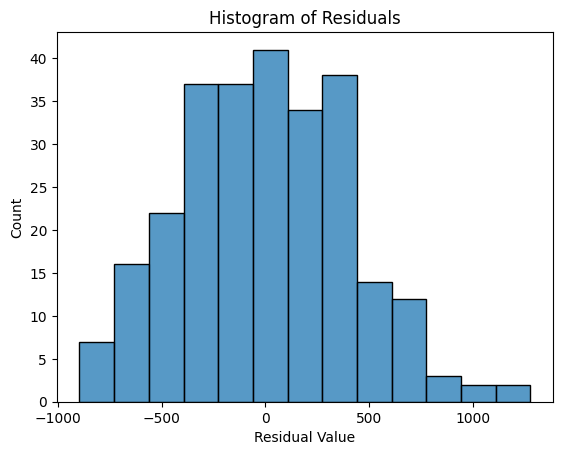

In [32]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

another way to check the normality function is to create a quantile-quantile or Q-Q plot. if the residuals are normally distributed, it would be expected a straight diagonal line going from the bottom left to the upper right of the Q-Q plot.

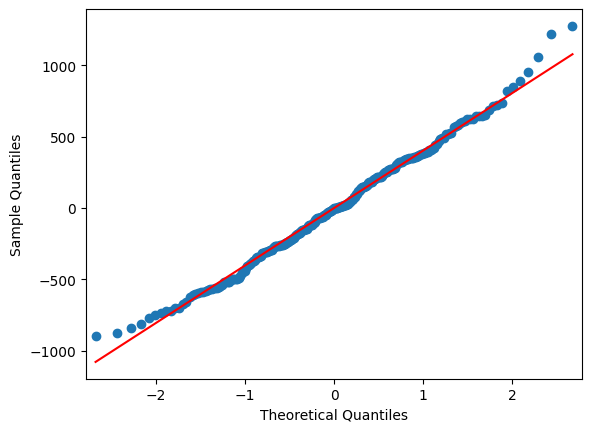

In [33]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, we can create a scatterplot of the fitted values and residuals. if the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

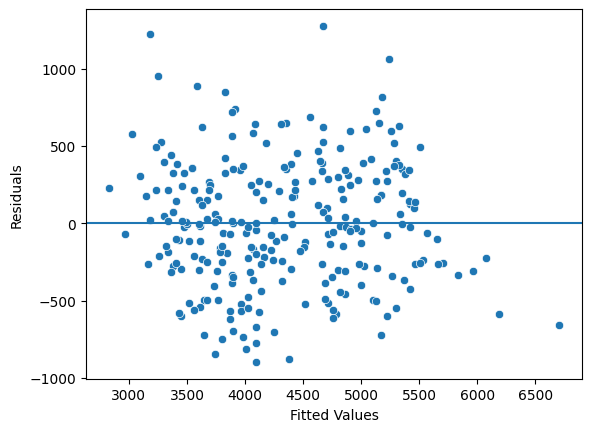

In [36]:
fig = sns.scatterplot(x=fitted_values, y=residuals)

# adding reference line at residuals = 0
fig.axhline(0)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

plt.show()